## Problem

Implement the Principal Component Analysis (PCA) algorithm for dimensionality reduction.

- **Input**: X (shape N*k)
- **Output**: X_reduced (shape N*r)

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
# Data setup
X = np.random.uniform(low=0, high=20, size=(20, 1))
y = 5 * X + 3 + np.random.standard_normal((20, 1)) * 4
X = np.hstack([X, y])

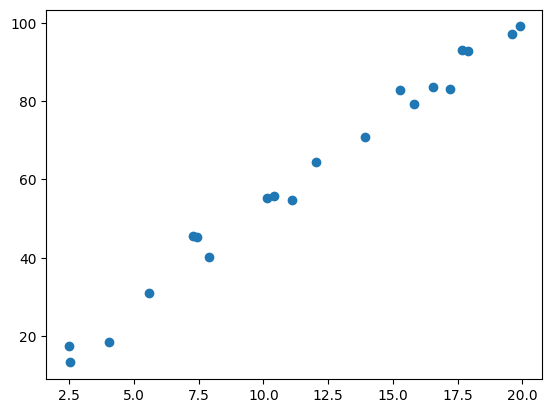

In [18]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

## Solution/Implementation

In [28]:
class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self._mean = None
        self._components = None
        self._eigenvalues = None
    
    def fit(self, X):
        self._mean = np.mean(X, axis=0)
        X_centered = X - self._mean
        cov = np.cov(X_centered, rowvar=False)
        eigenvalues, eigenvectors = np.linalg.eig(cov)
        sorted_idx = np.argsort(eigenvalues)[::-1][:self.n_components]
        self._components = eigenvectors[:, sorted_idx]
        self._eigenvalues = eigenvalues[sorted_idx]

    def transform(self, X):
        assert self._components is not None, "fit() not called yet!"
        return np.dot(X - self._mean, self._components)

In [29]:
pca = PCA(1)
pca.fit(X)
X_reduced = pca.transform(X)
print(X_reduced)

[[ -3.3416931 ]
 [ 48.77490755]
 [ -9.84402567]
 [  6.43972481]
 [ 16.51530961]
 [-36.72870606]
 [ 21.25975547]
 [ 44.56906434]
 [ 30.8400074 ]
 [  6.20410415]
 [-38.78693025]
 [-22.94299226]
 [-32.35844432]
 [ 43.41570307]
 [-22.59879232]
 [-18.6678577 ]
 [-32.57729973]
 [-21.84932084]
 [ 16.18819341]
 [  5.48929244]]


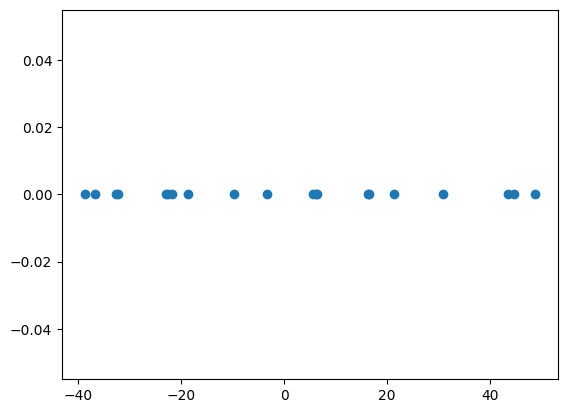

In [30]:
plt.scatter(X_reduced, [0 for _ in range(X_reduced.shape[0])])
plt.show()